Import necessary modules and load the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the data
file_path = '../data/raw/wine_quality_1000.csv'
data = pd.read_csv(file_path)
data = data.drop(columns=['Unnamed: 0'])

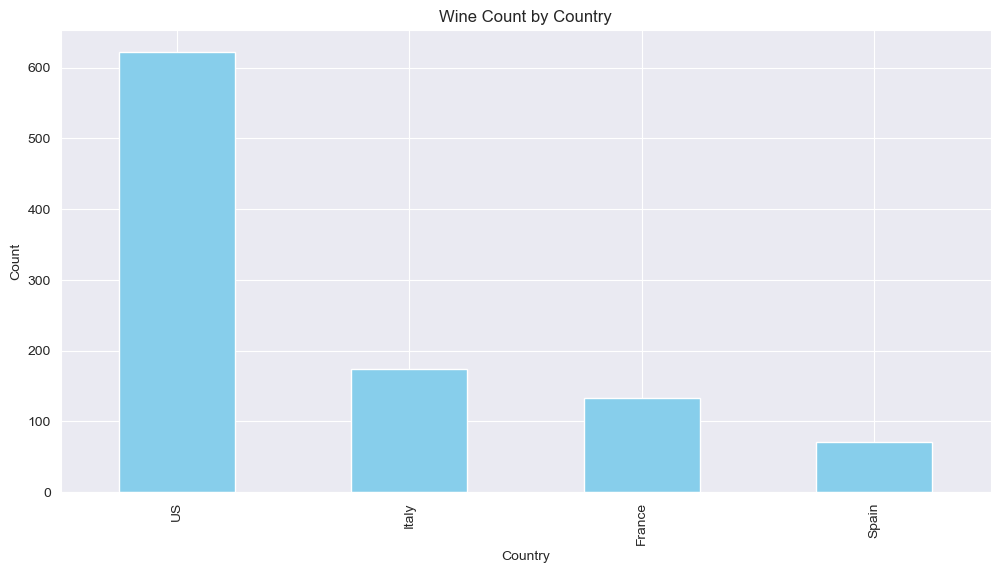

In [11]:
# Distribution of countries
plt.figure(figsize=(12, 6))
data['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Wine Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Clearly we need to upsample Italy, France and Spain.

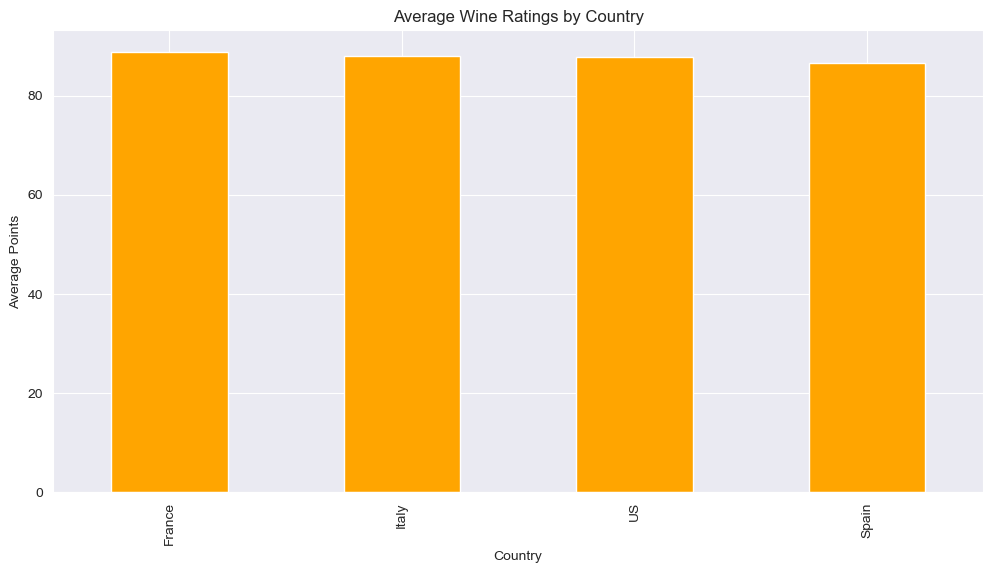

In [12]:
# Avg country points
plt.figure(figsize=(12, 6))
avg_points_by_country = data.groupby('country')['points'].mean().sort_values(ascending=False)
avg_points_by_country.plot(kind='bar', color='orange')
plt.title('Average Wine Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.show()

There doesn't seem to be any remarkably differentiating factor in points here

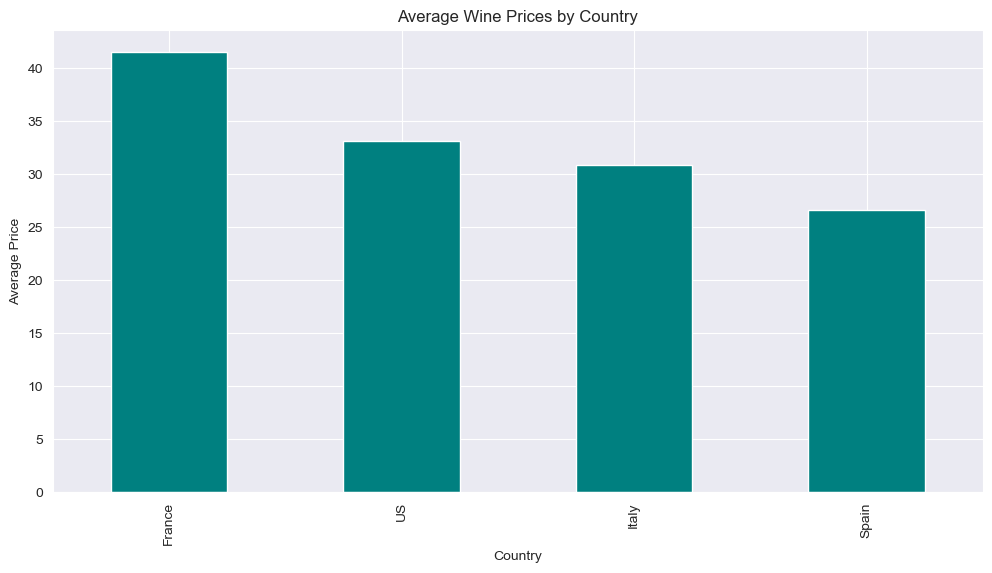

In [13]:
# Avg country price
plt.figure(figsize=(12, 6))
avg_price_by_country = data.groupby('country')['price'].mean().sort_values(ascending=False)
avg_price_by_country.plot(kind='bar', color='teal')
plt.title('Average Wine Prices by Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.show()

Prices may hold some information

C:\Users\aarya\AppData\Local\Temp\ipykernel_83852\1477592030.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(countries))  # Use a colormap for distinct colors


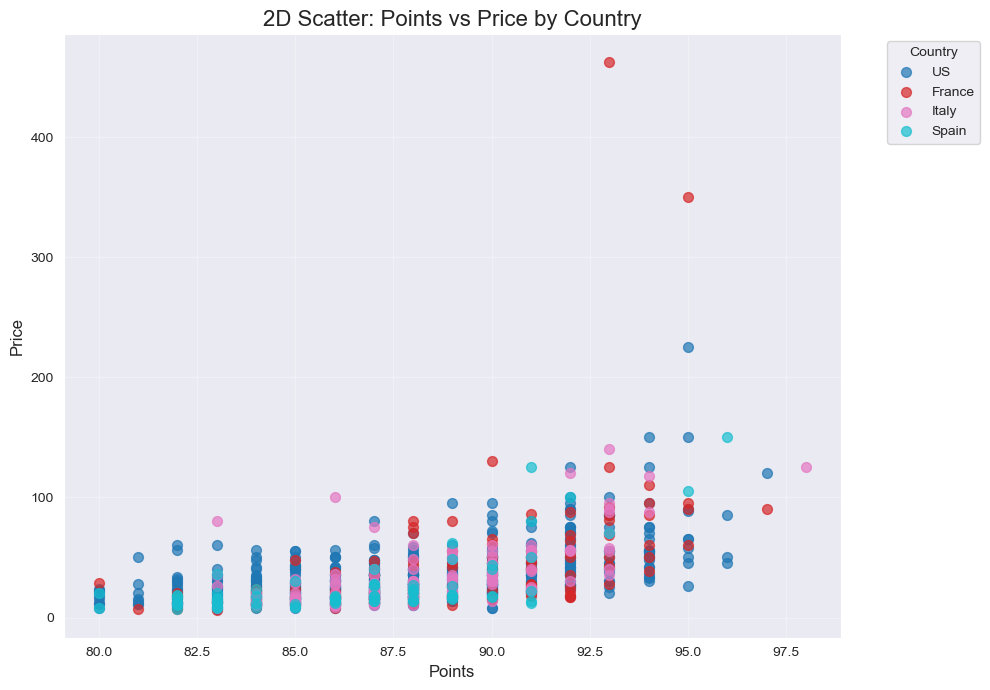

In [18]:
# Unique countries and color mapping
countries = data['country'].unique()
colors = plt.cm.get_cmap('tab10', len(countries))  # Use a colormap for distinct colors
country_to_color = {country: colors(i) for i, country in enumerate(countries)}

# 2D Scatter Plot
plt.figure(figsize=(10, 7))
for country in countries:
    country_data = data[data['country'] == country]
    plt.scatter(
        country_data['points'],
        country_data['price'],
        label=country,
        color=country_to_color[country],
        s=50,
        alpha=0.7
    )

# Labels and legend
plt.title('2D Scatter: Points vs Price by Country', fontsize=16)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

I cannot see any clear pattern here

<Figure size 1200x600 with 0 Axes>

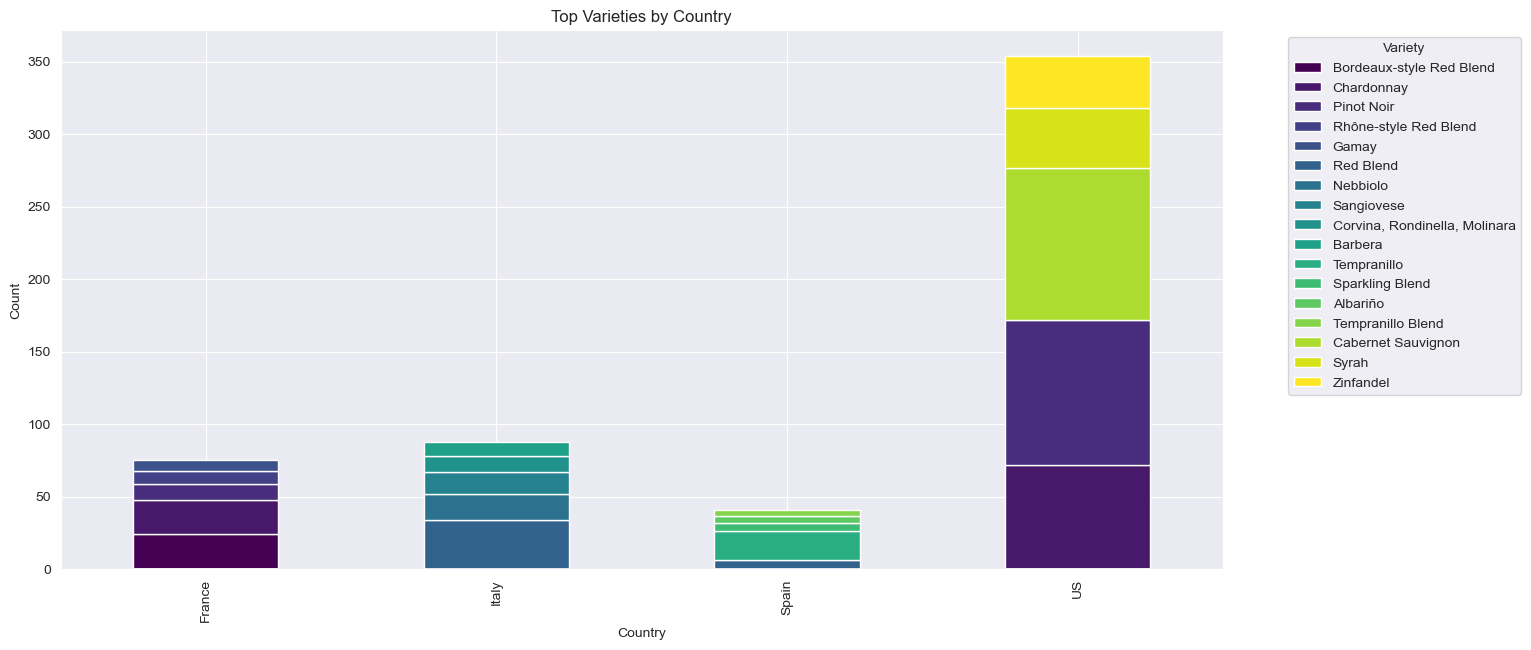

In [19]:
# Variety Analysis by Target
plt.figure(figsize=(12, 6))
top_varieties_by_country = data.groupby('country')['variety'].value_counts().groupby(level=0).head(5).unstack().fillna(0)
top_varieties_by_country.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 7))
plt.title('Top Varieties by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1))
plt.show()

Variety tpes can be telling. We can use the LLM and TfIdfVectoriser for this

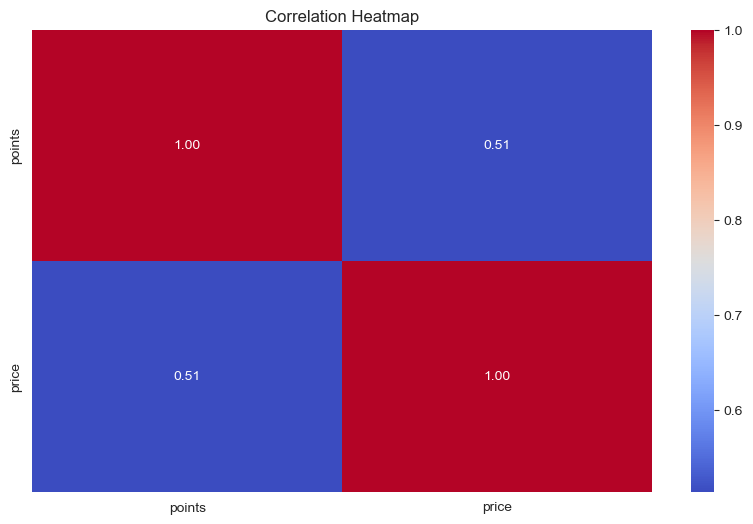

In [21]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Hmm, it shows these 2 features arent highly correlated so we can try use both, but as we know the points / ratings are pretty consistently distributed